Importer TensorFlow et d'autres bibliothèques

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-03-28 14:12:46.863381: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 14:12:47.346378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Charger des données à l'aide d'un utilitaire Keras

In [4]:
batch_size = 32
img_height = 256
img_width = 256
data_dir = 'simple_images'

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5966 files belonging to 75 classes.
Using 4773 files for training.


2023-03-28 14:12:51.024075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 14:12:51.032687: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 14:12:51.032984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 14:12:51.034978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 14:12:51.035334: I tensorflow/compile

Found 5966 files belonging to 75 classes.
Using 1193 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['abondance', 'babybel', 'banon', 'beaufort', "beaufort-d'ete", 'bethmale', 'bleu-de-bresse', 'bleu-des-causses', 'bleu-du-vercors-sassenage', 'boursin', 'brie', 'brillat-savarin', 'brocciu', 'camembert', 'cancoillotte', 'cantal', 'caprice-des-dieux', 'chaource', 'chavignol', 'comte', 'coulommiers', 'crottin-de-chavignol', 'emmental', 'epoisses', 'etorki', 'fol-epi', 'fondue-savoyarde', "fourme-d'ambert", 'fourme-de-montbrison', 'gaperon', 'gouda', 'gruyere', 'laguiole', 'langres', 'leerdammer', 'maconnais', 'maredsous', 'maroilles', 'mimolette', "mont-d'or", 'morbier', 'munster', 'neufchatel', 'ossau-iraty', 'parmesan', 'pelardon', 'petit-suisse', 'picodon', "pont-l'eveque", 'pouligny-saint-pierre', 'pyramide', 'raclette', 'reblochon', 'red-leicester', 'rocamadour', 'roquefort', 'saint-felicien', 'saint-marcellin', 'saint-nectaire', 'saint-paulin', 'sainte-maure-de-touraine', 'salers', 'selles-sur-cher', 'stilton', 'taleggio', 'tamie', 'tete-de-moine', 'tomme', 'tomme-de-chevre', 'tom

2023-03-28 14:13:03.688965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4773]
	 [[{{node Placeholder/_0}}]]
2023-03-28 14:13:03.689223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4773]
	 [[{{node Placeholder/_4}}]]


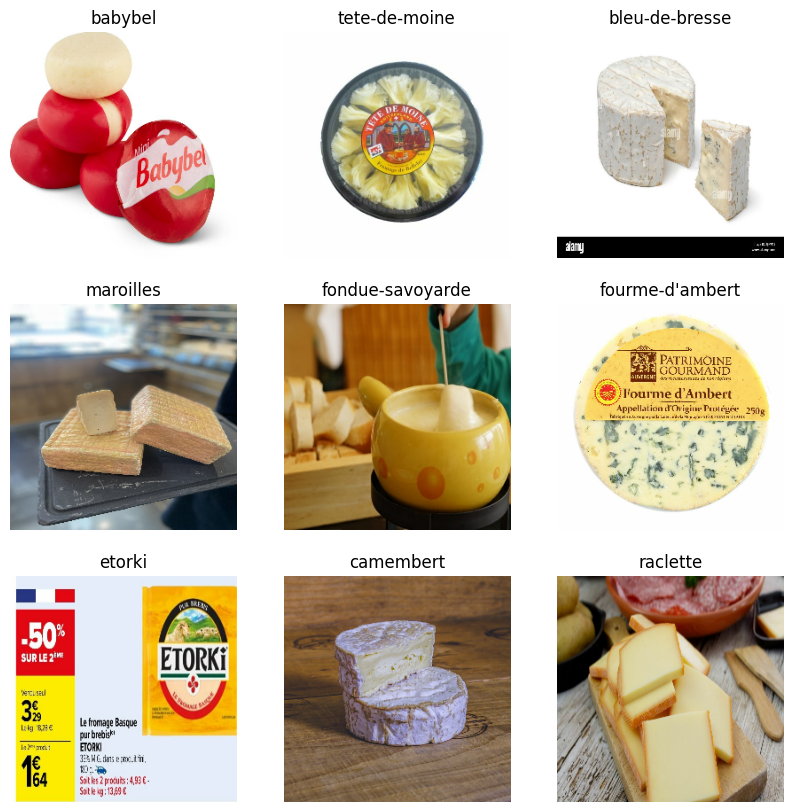

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Configurer l'ensemble de données pour les performances

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Augmentation des données

2023-03-28 14:13:09.888754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4773]
	 [[{{node Placeholder/_4}}]]
2023-03-28 14:13:09.889084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4773]
	 [[{{node Placeholder/_4}}]]
2023-03-28 14:13:10.947698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-28 14:13:14.748660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-28 14:13:16.335533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: i

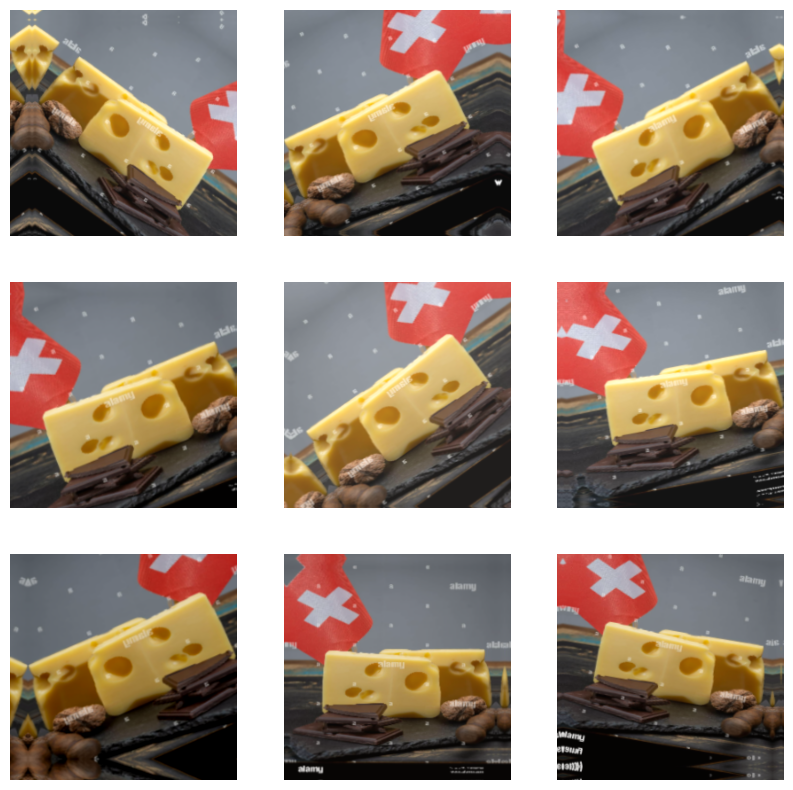

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomBrightness(0.1),
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Standardiser les données

In [8]:
# normalization_layer = layers.Rescaling(1./255)
# La layer est inclue dans la fonction de création du modèle

Modele

In [10]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [13]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
150/150 [==============================] - 3s 21ms/step - loss: 1.7817 - accuracy: 0.5093 - val_loss: 4.0402 - val_accuracy: 0.2347
Epoch 2/30
150/150 [==============================] - 3s 21ms/step - loss: 1.7933 - accuracy: 0.5164 - val_loss: 4.0424 - val_accuracy: 0.2649
Epoch 3/30
150/150 [==============================] - 3s 22ms/step - loss: 1.6952 - accuracy: 0.5252 - val_loss: 3.9444 - val_accuracy: 0.2850
Epoch 4/30
150/150 [==============================] - 4s 27ms/step - loss: 1.6532 - accuracy: 0.5345 - val_loss: 4.0923 - val_accuracy: 0.2607
Epoch 5/30
150/150 [==============================] - 3s 22ms/step - loss: 1.6140 - accuracy: 0.5426 - val_loss: 4.0037 - val_accuracy: 0.2691
Epoch 6/30
150/150 [==============================] - 3s 23ms/step - loss: 1.5490 - accuracy: 0.5571 - val_loss: 4.1791 - val_accuracy: 0.2640
Epoch 7/30
150/150 [==============================] - 3s 23ms/step - loss: 1.5433 - accuracy: 0.5661 - val_loss: 4.0512 - val_accuracy: 0.2842

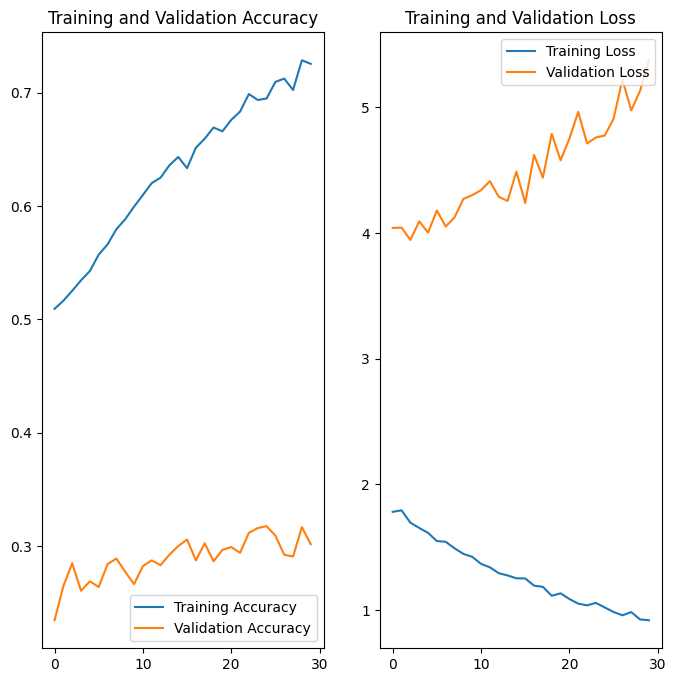

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Prédiction sur de nouvelles données

In [16]:
emmental_url = "https://media.istockphoto.com/id/1127471287/fr/photo/fromage-blanc.jpg?s=612x612&w=0&k=20&c=LKX0cXHP9w0Fukf6UxvK00Z5_Ryg_PFV3PPoDB3PC3c="
truc_url= "https://rappel.conso.gouv.fr/image/6d643a99-8e91-46f0-9e20-7b007ec60fa1.jpg"
fromage = tf.keras.utils.get_file('emmental_url', origin=emmental_url)

img = tf.keras.utils.load_img(
    fromage, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 13ms/step
This image most likely belongs to emmental with a 95.23 percent confidence.


In [ ]:
# Save the model to use on a Flutter app later
model.save('model')